## Anomaly Detection

**Anomalies are the unexpected behaviour in the observed world.**

There are various methods for finding anomaly. In this notebook we are going to find anomaly in temperature with the help of Moving Average Method.

For window size: 60, we will calculate the mean and standard deviation of the data.If the next entry in the dataframe lies between mean(+-)sd, it is considered normal else it is considered an anomaly.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from numpy import linspace, loadtxt, ones, convolve
import collections
from itertools import count
from random import randint
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [2]:
# Load the dataset
df=pd.read_csv('new_data.csv')

In [3]:
# Defining function for detemining moving average using discrete linear convolution of two one dimensional sequences
def mov_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

In [4]:
# Defining function for finding anomaly using stationary standard deviation
def find_anomalies(y, window_size, sigma=1.0):
    avg = mov_average(y, window_size).tolist() # Finding moving average and converting it into list
    residual = y - avg
    std = np.std(residual)
    return {'standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}

In [5]:
# Defining result for plotting result
def plot_results( y, window_size, sigma_value=1,applying_rolling_std=False):   
    plt.figure(figsize=(15, 8))
    y_av = mov_average(y, window_size)
    plt.plot( y_av, color='green')
    plt.xlabel("Time",fontsize=20)
    plt.ylabel("Temperature",fontsize=20)
    events = {}
    events = find_anomalies(y, window_size=window_size, sigma=sigma_value)
    x_anom = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anom = np.fromiter(events['anomalies_dict'].values(), dtype=float,count=len(events['anomalies_dict']))
    plt.plot(x_anom, y_anom, "r*")
    print(x_anom)
    plt.grid(True)
    plt.show()

[  409   410   419   420   421   422   468   469   470   471   472   588
   589   590   591   592   593   594   595   596   597   598   612   613
   614   615   616   617   618   619   620   621   622   623   624   625
   626   627   628   629   633   634   729  1162  1242  1243  1244  1245
  1246  1966  1967  1968  1969  1970  1971  2105  2222  2223  2764  2765
  2766  2767  2768  2769  2770  2771  2772  3312  3315  3316  3317  3318
  3319  3320  3321  3342  4019  4020  4021  4851  4852  4853  4857  4858
  4859  4860  4861  4862  4863  4864  4865  4866  4867  5007  5008  5009
  5209  5591  5592  5593  5594  5644  5645  5646  5647  5648  5649  5650
  6172  6173  6174  6241  6242  6243  6244  6245  6246  6247  6248  6249
  6427  6428  6429  6430  6431  6768  6769  6770  6771  6924  6925  6926
  7092  7093  7094  7095  7096  7097  7098  7099  7100  7590  7591  7595
  7596  7597  7598  7599  7600  8057  8058  8059  8477  8539  8540  8541
  8542  8543  8544  8545  8546  9039  9040  9041  9

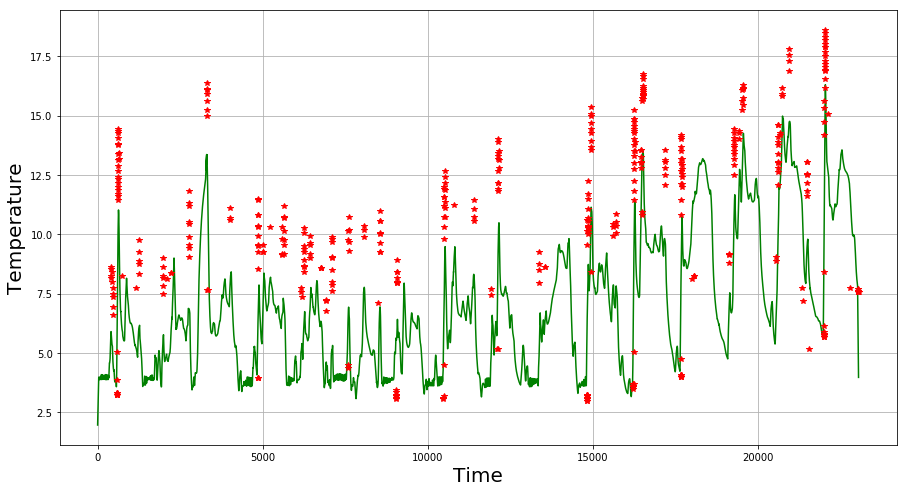

In [6]:
# plot the results
Y = df['Site-1 > Freezer-1']
plot_results(y=Y, window_size=60,sigma_value=3)

### Red points represent anomalies in temperature